# Example 1 - estimating a constant

In this simple numerical example
let us attempt to estimate a scalar random constant, a voltage for
example. Let us assume that we can obtain
measurements of the constant, but that the measurements are corrupted
by a 0.1 volt RMS white measurement noise (e.g. our analog-to-digital
converter is not very accurate). 

Here, we will use data assimilation notation, where
- `f` denotes forecast (or prediction)
- `a` denotes analysis (or correction)
- `t` denotes the true value.

In this example, our process is governed
by the state equation,
$$\begin{align*}
x_{k} & = F x_{k-1}+w_{k}=x_{k-1}+w_{k}
\end{align*}$$
and the measurement equation,
$$\begin{align*}
y_{k} & = H x_{k}+v_{k} = x^{\mathrm{t}} + v_{k}.
\end{align*}$$
The state, being constant, does not change from step to step, so $F=I.$ Our noisy measurement
is of the state directly so $H=1.$ 

The time-update (forecast) equations are,
$$\begin{align}
x_{k+1}^{\mathrm{f}} & =  x_{k}^{\mathrm{a}}\,,\\
P_{k+1}^{\mathrm{f}} & =  P_{k}^{\mathrm{a}}+Q
\end{align}$$
and the measurement update (analysis) equations are
$$\begin{align}
K_{k+1} & = P_{k+1}^{\mathrm{f}}(P_{k+1}^{\mathrm{f}}+R)^{-1},\\
x_{k+1}^{\mathrm{a}} & = x_{k+1}^{\mathrm{f}}+K_{k+1}(y_{k+1}-x_{k+1}^{\mathrm{f}}),\\
P_{k+1}^{\mathrm{a}} & = (1-K_{k+1})P_{k+1}^{\mathrm{f}}.
\end{align}$$

:::{important} Initialization
Presuming a very small process variance,
we let $Q=1.\mathrm{e}-5$. We could certainly let $Q=0$ but assuming a small
but non-zero value gives us more flexibility in  tuning
the filter as we will demonstrate below. Let us assume
from experience that we know the true value of the random constant
has a standard Gaussian probability distribution, so we will seed
our filter with the guess that the constant is $0.$ In other words,
before starting we let $x_{0}=0.$ Similarly we need to choose an
initial value for $P_{k}^{\mathrm{a}}$, call it $P_{0}.$ If we were absolutely
certain that our initial state estimate was correct, we would let
$P_{0}=0.$ However, given the uncertainty in our initial estimate
$x_{0},$ choosing $P_{0}=0$ would cause the filter to initially
and always believe that $x_{k}^{\mathrm{a}}=0.$ As it turns out, the alternative
choice is not critical. We could choose almost any $P_{0}\neq0$ and
the filter would eventually converge. We will start our filter with
$P_{0}=1.$
:::

:::{admonition} Simulations
To begin with, we randomly chose a scalar constant
$y=-0.37727.$ We then simulate $100$ distinct measurements that
have an error normally-distributed around zero with a standard deviation
of $0.1$ (remember we supposed that the measurements are corrupted
by a $0.1$ volt RMS white measurement noise). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1955)

#plt.rcParams['figure.figsize'] = (10, 6)

def KF_ct(n_iter=50, sig_w=0.001, sig_v=0.1):

    # intial parameters
    n_iter = 50
    sz = (n_iter,) # size of array
    x = -0.37727 # truth value
    z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)
    
    Q = sig_w**2 # 1e-6 # process variance
    
    # allocate space for arrays
    xhat      = np.zeros(sz)      # a posteri estimate of x
    P         = np.zeros(sz)         # a posteri error estimate
    xhatminus = np.zeros(sz) # a priori estimate of x
    Pminus    = np.zeros(sz)    # a priori error estimate
    K         = np.zeros(sz)         # gain or blending factor
    
    R = sig_v**2 # 0.1**2 # estimate of measurement variance, change to see effect
    
    # intial guesses
    xhat[0] = 0.0
    P[0] = 1.0
    
    for k in range(1,n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q
    
        # measurement update
        K[k] = Pminus[k]/( Pminus[k] + R )
        xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
        P[k] = (1 - K[k])*Pminus[k]
    
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle('KF with default values')
    ax1.plot(z,'ro',label='noisy measurements')
    ax1.plot(xhat,'b-',label='KF posterior estimate')
    ax1.axhline(x,color='g',label='true value')
    ax1.legend()
    #ax1.set_title('Estimate vs. iteration step', fontweight='bold')
    #ax1.set(xlabel='Iteration', ylabel='Voltage')
    
    valid_iter = range(1,n_iter) # Pminus not valid at step 0
    ax2.semilogy(valid_iter,Pminus[valid_iter],label='a priori error estimate')
    ax2.grid()
    #ax2.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
    #ax2.set_title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
    ax2.set(xlabel='Iteration', ylabel='Voltage$^2$') #, ylim=[0,.01])

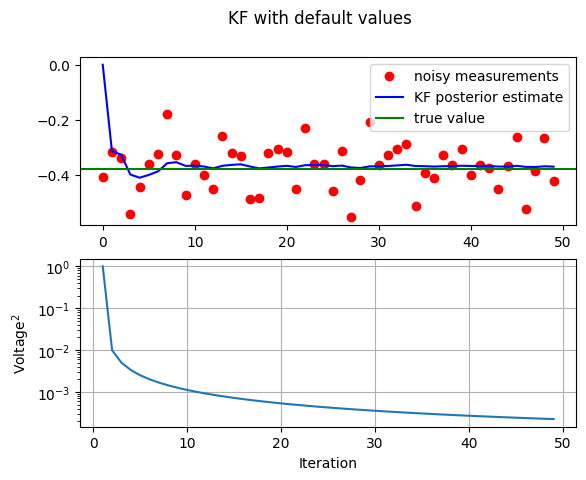

In [2]:
# use all default values
KF_ct()